In [1]:
import pandas as pd
import numpy as np
from io import StringIO
%matplotlib inline
from rdflib import Graph,URIRef, tools
from gastrodon import LocalEndpoint,one,QName
pd.set_option("display.width",100)
pd.set_option("display.max_colwidth",80)
import statistics
from csvwlib import CSVWConverter
import rdflib

### Merging files yago_type

In [2]:
input_path = "/media/rivas/Data1/Data-mining/Kcap/datasets/Yago10/Yago10_Type/"
y_type = pd.read_csv(input_path + 'types_test_001.tsv', delimiter='\t', header=None)
y_type[2] = y_type[2] + " ."
y_type_b = pd.read_csv(input_path + 'types_test_002.tsv', delimiter='\t', header=None)
y_type_b[2] = y_type_b[2] + " ."
frames = [y_type, y_type_b]
y_type = pd.concat(frames)
y_type_b = pd.read_csv(input_path + 'types_test_002.tsv', delimiter='\t', header=None)
y_type_b[2] = y_type_b[2] + " ."
frames = [y_type, y_type_b]
y_type = pd.concat(frames)
y_type_b = pd.read_csv(input_path + 'types_test_003.tsv', delimiter='\t', header=None)
y_type_b[2] = y_type_b[2] + " ."
frames = [y_type, y_type_b]
y_type = pd.concat(frames)
y_type_b = pd.read_csv(input_path + 'types_test_004.tsv', delimiter='\t', header=None)
y_type_b[2] = y_type_b[2] + " ."
frames = [y_type, y_type_b]
y_type = pd.concat(frames)
y_type_b = pd.read_csv(input_path + 'types_test_005.tsv', delimiter='\t', header=None)
y_type_b[2] = y_type_b[2] + " ."
frames = [y_type, y_type_b]
y_type = pd.concat(frames)
y_type_b = pd.read_csv(input_path + 'types_train_001.tsv', delimiter='\t', header=None)
y_type_b[2] = y_type_b[2] + " ."
frames = [y_type, y_type_b]
y_type = pd.concat(frames)
y_type_b = pd.read_csv(input_path + 'types_train_002.tsv', delimiter='\t', header=None)
y_type_b[2] = y_type_b[2] + " ."
frames = [y_type, y_type_b]
y_type = pd.concat(frames)
y_type_b = pd.read_csv(input_path + 'types_train_003.tsv', delimiter='\t', header=None)
y_type_b[2] = y_type_b[2] + " ."
frames = [y_type, y_type_b]
y_type = pd.concat(frames)
y_type_b = pd.read_csv(input_path + 'types_train_004.tsv', delimiter='\t', header=None)
y_type_b[2] = y_type_b[2] + " ."
frames = [y_type, y_type_b]
y_type = pd.concat(frames)
y_type_b = pd.read_csv(input_path + 'types_train_005.tsv', delimiter='\t', header=None)
y_type_b[2] = y_type_b[2] + " ."
frames = [y_type, y_type_b]
y_type = pd.concat(frames)

### Including the prefix

In [3]:
y_type[0] = y_type[0].str.replace('<', '<http://yago-knowledge.org/resource/')
y_type[1] = y_type[1].str.replace('rdf:type', '<http://www.w3.org/1999/02/22-rdf-syntax-ns#type>')
y_type[2] = y_type[2].str.replace('<', '<http://yago-knowledge.org/resource/')

### Fixing mistake (include the char '>' in some one objects)

In [4]:
y_type[2] = y_type[2].str.replace(' .', '> .')
y_type[2] = y_type[2].str.replace(">> .", '> .')

### Save Yago10Type

In [5]:
y_type.to_csv(input_path + 'Yago10_Type.nt', sep='\t', index = None, header=False)

## Load data 

In [7]:
input_path = "/media/rivas/Data1/Data-mining/Kcap/datasets/Yago10/"

y10_type = input_path +"Yago10_Type/" + "Yago10_Type.nt"
y_s_taxonomy = input_path + "yagoSimpleTaxonomy.ttl"

yago_taxonomy = Graph()
yago_taxonomy.parse(y_s_taxonomy, format="turtle")
#yago_type = Graph()
#yago_type.parse(y_s_type, format="turtle")
#drugbank.parse(f_drugbank, format="turtle")
yago10_type = Graph()
yago10_type.parse(y10_type, format="nt")

print(len(yago10_type))
print(len(yago_taxonomy))

http://yago-knowledge.org/resource/wikicat_Railway_companies_disestablished_in_1970<!--January_12_to_BN--> does not look like a valid URI, trying to serialize this will break.
http://yago-knowledge.org/resource/wikicat_Albums_produced_by_Noel_"Detail"_Fisher does not look like a valid URI, trying to serialize this will break.
http://yago-knowledge.org/resource/wikicat_Railway_companies_disestablished_in_1935<!--probably--> does not look like a valid URI, trying to serialize this will break.
http://yago-knowledge.org/resource/wikicat_Companies_operating_former_Western_Pacific_Railroad_lines<!--branch_to_Montezuma--> does not look like a valid URI, trying to serialize this will break.
http://yago-knowledge.org/resource/wikicat_Railway_companies_disestablished_in_1857<!--this_is_when_the_state_sold_the_property_to_the_PRR--> does not look like a valid URI, trying to serialize this will break.
http://yago-knowledge.org/resource/wikicat_Railway_companies_established_in_1990<!--I_think--> do

http://yago-knowledge.org/resource/wikicat_Railway_companies_established_in_1918<!--I_think--> does not look like a valid URI, trying to serialize this will break.
http://yago-knowledge.org/resource/wikicat_Companies_operating_former_Southern_Railway_(U.S.)_lines<!--ABL_and_HRT--> does not look like a valid URI, trying to serialize this will break.
http://yago-knowledge.org/resource/wikicat_Albums_produced_by_Warren_"Oak"_Felder does not look like a valid URI, trying to serialize this will break.
http://yago-knowledge.org/resource/wikicat_Screenplays_by_"Weird_Al"_Yankovic does not look like a valid URI, trying to serialize this will break.
http://yago-knowledge.org/resource/wikicat_Companies_operating_former_Chicago_and_North_Western_Transportation_Company_lines<!--including_CGW_and_M&StL--> does not look like a valid URI, trying to serialize this will break.
http://yago-knowledge.org/resource/wikicat_Companies_operating_former_New_York_Central_Railroad_lines<!--Pittsfield_to_Saline--

http://yago-knowledge.org/resource/wikicat_Royce_da_5'9"_songs does not look like a valid URI, trying to serialize this will break.
http://yago-knowledge.org/resource/wikicat_Malayalam _Cinematographers does not look like a valid URI, trying to serialize this will break.
http://yago-knowledge.org/resource/wikicat_People_from_<!--_Edwards_-->Peoria_County,_Illinois does not look like a valid URI, trying to serialize this will break.
http://yago-knowledge.org/resource/wikicat_Companies_operating_former_Canadian_Northern_Railway_lines<!--at_St.-Jerome--> does not look like a valid URI, trying to serialize this will break.
http://yago-knowledge.org/resource/wikicat_Companies_operating_former_Kansas_City_Southern_Railway_lines<!--at_Hope--> does not look like a valid URI, trying to serialize this will break.
http://yago-knowledge.org/resource/wikicat_Pubs_in_<!--art._lists_London_pubs_specifically,_as_well_as_around_England-->London does not look like a valid URI, trying to serialize this w

http://yago-knowledge.org/resource/wikicat_Companies_operating_former_Illinois_Central_Railroad_lines<!--ex-Indiana_Hi-Rail,_Henderson_and_Evansville--> does not look like a valid URI, trying to serialize this will break.
http://yago-knowledge.org/resource/wikicat_Albums_produced_by_Johnny_"J" does not look like a valid URI, trying to serialize this will break.
http://yago-knowledge.org/resource/wikicat_Albums_produced_by_Donald_"Duck"_Dunn does not look like a valid URI, trying to serialize this will break.
http://yago-knowledge.org/resource/wikicat_Railway_companies_disestablished_in_1942<!--merged_into_AT&SF--> does not look like a valid URI, trying to serialize this will break.
http://yago-knowledge.org/resource/wikicat_Billy_"Crash"_Craddock_live_albums does not look like a valid URI, trying to serialize this will break.
http://yago-knowledge.org/resource/wikicat_Song_recordings_produced_by_William_"Mickey"_Stevenson does not look like a valid URI, trying to serialize this will br

http://yago-knowledge.org/resource/wikicat_Companies_operating_former_Missouri–Kansas–Texas_Railroad_lines<!--Columbus-Galena,_Fort_Worth-Waxahachie--> does not look like a valid URI, trying to serialize this will break.
http://yago-knowledge.org/resource/wikicat_Music_videos_directed_by_"Weird_Al"_Yankovic does not look like a valid URI, trying to serialize this will break.
http://yago-knowledge.org/resource/wikicat_"Weird_Al"_Yankovic_albums does not look like a valid URI, trying to serialize this will break.
http://yago-knowledge.org/resource/wikicat_Companies_operating_former_Chicago,_Milwaukee,_St._Paul_and_Pacific_Railroad_lines<!--from_WC--> does not look like a valid URI, trying to serialize this will break.
http://yago-knowledge.org/resource/wikicat_Companies_operating_former_Boston_and_Maine_Corporation_lines<!--in_New_York--> does not look like a valid URI, trying to serialize this will break.
http://yago-knowledge.org/resource/wikicat_Companies_operating_former_Pittsburgh_a

http://yago-knowledge.org/resource/"Weird_Al"_Yankovic does not look like a valid URI, trying to serialize this will break.
http://yago-knowledge.org/resource/"Weird_Al"_Yankovic does not look like a valid URI, trying to serialize this will break.
http://yago-knowledge.org/resource/"Weird_Al"_Yankovic does not look like a valid URI, trying to serialize this will break.
http://yago-knowledge.org/resource/"Weird_Al"_Yankovic does not look like a valid URI, trying to serialize this will break.
http://yago-knowledge.org/resource/"Weird_Al"_Yankovic does not look like a valid URI, trying to serialize this will break.
http://yago-knowledge.org/resource/"Weird_Al"_Yankovic does not look like a valid URI, trying to serialize this will break.
http://yago-knowledge.org/resource/"Weird_Al"_Yankovic does not look like a valid URI, trying to serialize this will break.
http://yago-knowledge.org/resource/"Weird_Al"_Yankovic does not look like a valid URI, trying to serialize this will break.
http://y

http://yago-knowledge.org/resource/Cry_"Havoc" does not look like a valid URI, trying to serialize this will break.
http://yago-knowledge.org/resource/Cry_"Havoc" does not look like a valid URI, trying to serialize this will break.
http://yago-knowledge.org/resource/Cry_"Havoc" does not look like a valid URI, trying to serialize this will break.
http://yago-knowledge.org/resource/Cry_"Havoc" does not look like a valid URI, trying to serialize this will break.
http://yago-knowledge.org/resource/Cry_"Havoc" does not look like a valid URI, trying to serialize this will break.
http://yago-knowledge.org/resource/Cry_"Havoc" does not look like a valid URI, trying to serialize this will break.
http://yago-knowledge.org/resource/Cry_"Havoc" does not look like a valid URI, trying to serialize this will break.
http://yago-knowledge.org/resource/Cry_"Havoc" does not look like a valid URI, trying to serialize this will break.
http://yago-knowledge.org/resource/Cry_"Havoc" does not look like a vali

http://yago-knowledge.org/resource/George_"Gabby"_Hayes does not look like a valid URI, trying to serialize this will break.
http://yago-knowledge.org/resource/George_"Gabby"_Hayes does not look like a valid URI, trying to serialize this will break.
http://yago-knowledge.org/resource/George_"Gabby"_Hayes does not look like a valid URI, trying to serialize this will break.
http://yago-knowledge.org/resource/George_"Gabby"_Hayes does not look like a valid URI, trying to serialize this will break.
http://yago-knowledge.org/resource/George_"Gabby"_Hayes does not look like a valid URI, trying to serialize this will break.
http://yago-knowledge.org/resource/George_"Gabby"_Hayes does not look like a valid URI, trying to serialize this will break.
http://yago-knowledge.org/resource/George_"Gabby"_Hayes does not look like a valid URI, trying to serialize this will break.
http://yago-knowledge.org/resource/George_"Gabby"_Hayes does not look like a valid URI, trying to serialize this will break.


http://yago-knowledge.org/resource/Arthur_"Guitar_Boogie"_Smith does not look like a valid URI, trying to serialize this will break.
http://yago-knowledge.org/resource/Arthur_"Guitar_Boogie"_Smith does not look like a valid URI, trying to serialize this will break.
http://yago-knowledge.org/resource/Arthur_"Guitar_Boogie"_Smith does not look like a valid URI, trying to serialize this will break.
http://yago-knowledge.org/resource/Arthur_"Guitar_Boogie"_Smith does not look like a valid URI, trying to serialize this will break.
http://yago-knowledge.org/resource/Arthur_"Guitar_Boogie"_Smith does not look like a valid URI, trying to serialize this will break.
http://yago-knowledge.org/resource/Arthur_"Guitar_Boogie"_Smith does not look like a valid URI, trying to serialize this will break.
http://yago-knowledge.org/resource/Arthur_"Guitar_Boogie"_Smith does not look like a valid URI, trying to serialize this will break.
http://yago-knowledge.org/resource/Arthur_"Guitar_Boogie"_Smith does 

http://yago-knowledge.org/resource/wikicat_Companies_operating_former_Great_Northern_Railway_(U.S.)_lines<!--DM&E--> does not look like a valid URI, trying to serialize this will break.
http://yago-knowledge.org/resource/wikicat_Companies_operating_former_Chicago_and_North_Western_Transportation_Company_lines<!--DM&E--> does not look like a valid URI, trying to serialize this will break.
http://yago-knowledge.org/resource/wikicat_Companies_operating_former_Chicago,_Rock_Island_and_Pacific_Railroad_lines<!--IC&E--> does not look like a valid URI, trying to serialize this will break.
http://yago-knowledge.org/resource/wikicat_Companies_operating_former_Pennsylvania_Railroad_lines<!--D&H--> does not look like a valid URI, trying to serialize this will break.
http://yago-knowledge.org/resource/wikicat_Academicians_of_the_Russian_Academy_of_Cinema_Arts_and_Sciences_"Nika" does not look like a valid URI, trying to serialize this will break.
http://yago-knowledge.org/resource/Skopje_"Alexande

1587343
629688


## Create local endpoint (yago_type and yago_taxonomy)

In [8]:
print(len(yago10_type))
print(len(yago_taxonomy))
y_type=LocalEndpoint(yago10_type)
y_taxonomy=LocalEndpoint(yago_taxonomy)

1587343
629688


## Select only person type

In [9]:
subj_pred_person = y_type.select("""
   SELECT distinct ?s ?p WHERE{
      ?s ?p <http://yago-knowledge.org/resource/wordnet_person_100007846>      
   }
""")

## Include the object person and preapre dataframe to save in .nt 

In [11]:
subj_pred_person.insert(2, "o", '<http://yago-knowledge.org/resource/wordnet_person_100007846> .')
subj_pred_person['s'] = '<' + subj_pred_person['s'] + '>'
subj_pred_person['p'] = subj_pred_person['p'].str.replace('rdf:type', '<http://www.w3.org/1999/02/22-rdf-syntax-ns#type>')
subj_pred_person.to_csv(input_path + 'Yago10_type_person.nt', sep='\t', index = None, header=False)

<http://yago-knowledge.org/resource/David_Janssen does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Javier_Navarrete does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Barbara_Lawrence does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Priyanka_Upendra does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Catherine_Hicks does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Paul_Dessau does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Natalia_Oreiro does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Arlene_Phillips does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/

<http://yago-knowledge.org/resource/Conrad_Salinger does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/A._K._Hangal does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Ikki_Kajiwara does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Donald_Fagen does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Charley_Chase does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Dylan_McDermott does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Dave_Goelz does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Enrique_Carreras does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Alice_Sapr

<http://yago-knowledge.org/resource/Franz_Ernst_Neumann does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Melissa_George does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Hermann_Göring does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Stuart_A._Rice does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Robert_Wise does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Bryan_Kirkwood_(producer) does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Calista_Flockhart does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Tiye does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resourc

<http://yago-knowledge.org/resource/Dwight_Schultz does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Alex_Lifeson does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Alan_Ladd does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Brett_Cullen does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Alexander_Suvorov does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Arshad_Warsi does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Cleopatra_II_of_Egypt does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Paul_Dano does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/William_Du

<http://yago-knowledge.org/resource/John_Wood_(English_actor) does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Sydney_Tamiia_Poitier does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Johannes_Rietstap does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Tiny_Brauer does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Jim_Mooney does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Valerio_Zurlini does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Matt_Stone does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Christopher_Rouse_(editor) does not look like a valid URI, trying to serialize this will break.
<http://yago-know

<http://yago-knowledge.org/resource/Shaun_Cassidy does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Fred_Clark does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Urraca_Fernández does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Jimmy_Wales does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Yanni does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Carol_Sobieski does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Lucius_Shepard does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Tetsuya_(musician) does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Michael_Gibbs_(

<http://yago-knowledge.org/resource/Reza_Aslan does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Walter_Reisch does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Charles_de_Gaulle does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Roy_Rogers does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Paula_Fox does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Paul_L._Freeman,_Jr. does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Milo_O'Shea does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Adam_Baldwin does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Wesley_Snipes 

<http://yago-knowledge.org/resource/Maria_of_Swabia does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Eli_Roth does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Jason_Lee_(actor) does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Emilio_Fernández does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Louis_Guilloux does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/David_Angell does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Sam_Newfield does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Dorothea_Jordan does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Lindsay

<http://yago-knowledge.org/resource/Philip,_Elector_Palatine does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Ivan_Yefimovich_Petrov does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Carl_Ludwig_Siegel does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Navdeep does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/David_X._Cohen does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Uma_Thurman does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Adrian_Grenier does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Alfred_Shaughnessy does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.o

<http://yago-knowledge.org/resource/Francesco_Baracca does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Amanda_Bynes does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Frederick_C._Blesse does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Jason_London does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Joseph_Butler does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Christian_Wagner does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Gerald_McRaney does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Kid_Cudi does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Owen_

<http://yago-knowledge.org/resource/Frank_Libutti does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Paul_Thomas_Anderson does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Cheryl_Hines does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Renzo_Rossellini_(composer) does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/James_Van_Allen does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Brad_Dourif does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Mike_Newell_(director) does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Yakov_M._Rabkin does not look like a valid URI, trying to serialize this will break.
<http://yago-know

<http://yago-knowledge.org/resource/Harry_H._Corbett does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Wilfred_Lucas does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/George_Tabori does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Patricia_Medina does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Linnea_Quigley does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/John_Randolph_(actor) does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Alice_Eve does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/J._Walter_Ruben does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/

<http://yago-knowledge.org/resource/Masami_Kurumada does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Clovis_E._Byers does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Nastassja_Kinski does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Terence_Hill does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Henryk_Wars does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Jason_Reitman does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Gene_Nelson does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Keith_Devlin does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Carmine_Inf

<http://yago-knowledge.org/resource/Artūras_Paulauskas does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/James_Algar does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/V._Shantaram does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Max_Ophüls does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Mark_I._Fox does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/George_Frederick,_Margrave_of_Brandenburg-Ansbach does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Charles_Sutherland_Elton does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Grant_DePorter does not look like a valid URI, trying to serialize this will break.
<ht

<http://yago-knowledge.org/resource/Sridevi does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Beverly_D'Angelo does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Gerd_Oswald does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Lucille_Ball does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Anthony_Higgins_(actor) does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Si_Mohand does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Jock_Mahoney does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Russi_Taylor does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Nathan_Furst d

<http://yago-knowledge.org/resource/A._K._Lohithadas does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Michael_Sarrazin does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Michael_Winterbottom does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Edvard_Kocbek does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Perry_Banks does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Asia_Argento does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Jay_Cassidy does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Marian_Nixon does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Singe

<http://yago-knowledge.org/resource/Mike_Nichols does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Djimon_Hounsou does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Gene_Wilder does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Patty_Griffin does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Michel_Galabru does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Bill_Hunter_(actor) does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Fred_C._Brannon does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Henri_Baels does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/de/Jens

<http://yago-knowledge.org/resource/Harold_F._Kress does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Rajkumar_Santoshi does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Michael_Dibdin does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Alexander_Borodin does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Richard_H._Ellis does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Carly_Pope does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Harold_Keith_Johnson does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Andy_Griffith does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/res

<http://yago-knowledge.org/resource/Robert_Duvall does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/John_Martyn does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/B._Lenin does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Kate_Hudson does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/David_Baltimore does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/François_Cluzet does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Simon_Conway_Morris does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Ioan_Gruffudd does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Gabriele_Fe

<http://yago-knowledge.org/resource/George_Armitage does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Ali_(actor) does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Robin_Givens does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Joseph_Ruben does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Chico_Marx does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Alan_Shearer does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Patti_Page does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Penelope_Wilton does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Mario_Camerini does

<http://yago-knowledge.org/resource/Ralf_Möller does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Michael_Tucker_(actor) does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/James_Van_Der_Beek does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/August_Schellenberg does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Kinji_Fukasaku does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Carter_Burwell does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Yamina_Benguigui does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Jack_J._Catton does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.o

<http://yago-knowledge.org/resource/Lucio_Dalla does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Ray_E._Porter does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Bubba_Smith does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Dana_Delany does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Bud_Molin does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Ira_Steven_Behr does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Radha_Ravi does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Kalabhavan_Mani does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Augusto_Genina does n

<http://yago-knowledge.org/resource/Kelly_Hu does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Esmond_Knight does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/John_Browning does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Harrison_Ford does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Igor_Shafarevich does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Marta_Kauffman does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Robert_Lee_Moore does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Hamid_Dabashi does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Piero_De_B

<http://yago-knowledge.org/resource/Amanda_Peet does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/W._D._Amaradeva does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Peter_Haber does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Seijun_Suzuki does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Dany_Cooper does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Mae_West does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Rajendra_Krishan does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Madeleine_Stowe does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Siobhán_Donaghy 

<http://yago-knowledge.org/resource/Klaus_Kinski does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/D._B._Sweeney does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Harry_Lennix does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Paul_Ehrenfest does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Dorothy_Kingsley does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Krzysztof_Matyjaszewski does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Bill_Finger does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Hal_Hartley does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Shya

<http://yago-knowledge.org/resource/Sid_Meier does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Dave_Willis does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Jamelia does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Luke_Perry does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Franco_Interlenghi does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Navya_Nair does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Ilene_Woods does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Paolo_Stoppa does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Arthur_Leonard_Schawlow does

<http://yago-knowledge.org/resource/Karen_Uhlenbeck does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Paul_Mazursky does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Steve_Reeves does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Zoë_Wanamaker does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Mai_Zetterling does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Victor_Herbert does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Raj_Reddy does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/LeRoy_Mason does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Jake_Gyllenhaal

<http://yago-knowledge.org/resource/Saffron_Burrows does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Robert_Hardy does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Delhi_Ganesh does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/John_Romero does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Nigel_Havers does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Richard_Rush_(director) does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Harold_S._Bucquet does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Yaky_Yosha does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Alek

<http://yago-knowledge.org/resource/Jean_Renoir does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/KT_Tunstall does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Donn_A._Starry does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Chelsy_Davy does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Prabhu_(actor) does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Charles_Vidor does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Don_Ellis does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/James_Broughton does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Bunny_Breckinridge

<http://yago-knowledge.org/resource/Oscar_Griswold does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Scott_Snyder does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Rudolf_Peierls does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Tina_Ambani does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Isambard_Kingdom_Brunel does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Alan_Alda does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Lillian_Roth does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Riccardo_Giacconi does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Davi

<http://yago-knowledge.org/resource/Alexander_von_Linsingen does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/James_M._Gavin does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Gower_Champion does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Louis_I,_Duke_of_Bavaria does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/James_Wan does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Peter_O'Donnell does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Juliet_Stevenson does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Carina_Lau does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/

<http://yago-knowledge.org/resource/Melonie_Diaz does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/John_Pizzarelli does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Plácido_Domingo does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Stephen_McHattie does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Peter_Andre does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Mansoor_Khan does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Thanu_Padmanabhan does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Dimitrios_Sarrás does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Es

<http://yago-knowledge.org/resource/Hong_Sang-soo does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Randy_Jackson does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Sissy_Spacek does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/T._Michael_Moseley does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Friðrik_Þór_Friðriksson does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/John_Plaster does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Danny_Glover does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Jacqueline_McKenzie does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/res

<http://yago-knowledge.org/resource/Edward_B._Lewis does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Furio_Scarpelli does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Halina_Reijn does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Prince_Maximilian_of_Baden does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Robert_Douglas_(actor) does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Robert_Donat does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/J._Farrell_MacDonald does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Roy_Budd does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge

<http://yago-knowledge.org/resource/Ed_O'Neill does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Nino_Manfredi does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Sanjay_Kapoor does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Mahesh_Bhatt does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Charles_P._Hall does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Owen_Wilson does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Joseph_H._Lewis does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/András_Hadik does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/John_Hick does 

<http://yago-knowledge.org/resource/Brendon_Urie does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Gordon_Moore does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Denholm_Elliott does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Cornelius_(musician) does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Steve_Zahn does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Jean_Hagen does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Kim_Philby does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Norma_Shearer does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Bert_Trautmann

<http://yago-knowledge.org/resource/Daniel_Mann does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Walter_Koenig does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Jane_Urquhart does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Joseph_Calleia does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Francis_Veber does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Frankie_Howerd does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Wolfgang_Paul does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Edwin_J._Burke does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Stephanie_M

<http://yago-knowledge.org/resource/Erik_S._Kristensen does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Danny_Trejo does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Evalyn_Knapp does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Alsou does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Andrew_Peacock does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Sigismund_Báthory does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Bernard_McConville does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/George_B._Seitz does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Walon_

<http://yago-knowledge.org/resource/Simi_Garewal does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Arielle_Dombasle does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Michel_Serrault does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Marcel_Proust does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Emmanuelle_Béart does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Mel_Stuart does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Edmund_Andros does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Arun_Vijay does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Barrington_

<http://yago-knowledge.org/resource/Utpal_Dutt does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Vesa-Matti_Loiri does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Jennifer_Morrison does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Pierre-Dominique_Bazaine does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Frank_McHugh does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Michael_Tronick does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/John_English_(director) does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Lasse_Åberg does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.o

<http://yago-knowledge.org/resource/Roselyn_Sánchez does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Asrani does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Karl_Friedrich_von_dem_Knesebeck does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Sam_Simon does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/John_Hoyt does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Robert_Picardo does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Grigory_Margulis does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Matthew_Good does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Gra

<http://yago-knowledge.org/resource/Jeremy_Davies does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Ricardo_Aponte does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Jason_Wade does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Evan_Rachel_Wood does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Richard_Stone_(composer) does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Eleanor_Parker does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Agnès_Varda does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Draža_Mihailović does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resourc

<http://yago-knowledge.org/resource/Harry_Schwarz does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Saluri_Koteswara_Rao does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Curtis_Harrington does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Ferris_Webster does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Buck_Henry does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Archie_Mayo does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Sean_Combs does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Jennifer_Love_Hewitt does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/H

<http://yago-knowledge.org/resource/Thomas_Henry_Huxley does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Justin_Bartha does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/James_Franco does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/David_Duchovny does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Sonnie_Hale does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Kelly_Jones does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/John_Milbank does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/The_Rocket_Summer does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Jim_She

<http://yago-knowledge.org/resource/Nassim_Nicholas_Taleb does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Roscoe_Lee_Browne does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Neena_Gupta does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Ed_Wood does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Adam_Scott_(actor) does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Ryan_Reynolds does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/David_Paich does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Amy_Brenneman does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Georg

<http://yago-knowledge.org/resource/Angela_Lansbury does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Robert_F._McGowan does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Joe_Ruby does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Ben_Earl_Looney does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Rachel_Stevens does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Ryan_O'Neal does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Rollo_Armstrong does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Jacques_Brel does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Paul_Mich

<http://yago-knowledge.org/resource/Aung_San does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Garry_Marshall does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Art_Malik does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/William_VIII,_Landgrave_of_Hesse-Kassel does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Walter_Brennan does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Joshua_Brand does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Joel_Quenneville does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Cornelius_Vanderbilt_III does not look like a valid URI, trying to serialize this will break.
<http://yago-kno

<http://yago-knowledge.org/resource/A._Alfred_Taubman does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Amando_de_Ossorio does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Motojirō_Kajii does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Dick_Van_Dyke does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Sarah_Geronimo does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Scott_Gibbs does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Ingrid_Thulin does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Humphrey_Bogart does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Si

<http://yago-knowledge.org/resource/Mario_Caiano does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Refaat_Al-Gammal does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Giacomo_della_Porta does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Robert_Mulligan does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Kirk_Douglas does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Manuel_Alexandre does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Pat_Bowlen does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Rachel_Ticotin does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Jo

<http://yago-knowledge.org/resource/Vikraman does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Tom_M._Apostol does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Tilda_Swinton does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Georges_Franju does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Julian_Nott does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Vinoba_Bhave does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Grant_Morrison does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Lina_Basquette does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Mykelti_Williams

<http://yago-knowledge.org/resource/Ferdinand_von_Richthofen does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Bert_Lytell does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Ray_McCarey does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Rebecca_Romijn does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Geoff_Zanelli does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Thomas_H._Ince does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Arthur_Hilton does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Philippe_Mora does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Jim

<http://yago-knowledge.org/resource/Gordon_Murray does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Bernard_Lee does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Ralph_A._Ofstie does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Martin_Ryle does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Gina_McKee does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Robert_Brandom does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Terence_Winter does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Ethel_Kennedy does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Carl_Stiner doe

<http://yago-knowledge.org/resource/Bruce_Willis does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Jane_Powell does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Ferdinand_Albert_II,_Duke_of_Brunswick-Wolfenbüttel does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Gary_Usher does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Jaishankar does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Bindu_(actress) does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Boman_Irani does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Hosni_Mubarak does not look like a valid URI, trying to serialize this will break.
<http://yago-knowle

<http://yago-knowledge.org/resource/Alan_Dinehart does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Takashi_Shimizu does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/David_H._Hubel does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Joan_Hackett does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Kirron_Kher does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Antony_Hopkins does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Olivia_d'Abo does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Cyndi_Lauper does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/John_G._Adolf

<http://yago-knowledge.org/resource/Martin_Balsam does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Andrew_Yao does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Enrico_Bombieri does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/James_J._Lindsay does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Bernadette_Peters does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Basu_Chatterjee does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/David_Miller_(director) does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Teejan_Bai does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resour

<http://yago-knowledge.org/resource/Xzibit does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Margaret_Sullavan does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Kevin_Costner does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Jonathan_Jackson_(actor) does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Phil_Karlson does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Rajko_Grlić does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Isha_Koppikar does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Aparna_Sen does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Robert_And

<http://yago-knowledge.org/resource/David_Farrar_(actor) does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Jenny_Agutter does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Cochin_Haneefa does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/George_Sanger_(musician) does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Colin_James does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Mary_Stuart,_Countess_of_Bute does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Andrew_Garfield does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Ashley_Tisdale does not look like a valid URI, trying to serialize this will break.
<http://yago

<http://yago-knowledge.org/resource/Reena_Roy does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Wilhelm_Eduard_Weber does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/T._K._Rajeev_Kumar does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Arthur_Henry_Gooden does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Herbert_Wilcox does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/J._R._D._Tata does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Ernest_C._Brace does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Malcolm_McLaren does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/re

<http://yago-knowledge.org/resource/Colin_Friels does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Roger_Scruton does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Greer_Garson does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Danielle_Mitterrand does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Steve_Stevens does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Jo_Swerling does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/B._Saroja_Devi does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/A._P._Younger does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Sam_Egan 

<http://yago-knowledge.org/resource/Tatineni_Rama_Rao does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Héctor_Elizondo does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/John_Dudley,_1st_Duke_of_Northumberland does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Kristen_Wiig does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Shawn_Hatosy does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Nevil_Shute does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Vasiliy_Grabin does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Anthony_Trollope does not look like a valid URI, trying to serialize this will break.
<http://yago-kno

<http://yago-knowledge.org/resource/Savitri_(actress) does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/George_Fenton does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Kenneth_Cope does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Geoffrey_Rush does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Robert_Lees does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Rae_Dawn_Chong does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Ismael_Rodríguez does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Leonardo_da_Vinci does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Shr

<http://yago-knowledge.org/resource/Johannes-Rudolf_Mühlenkamp does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Saif_Ali_Khan does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Sheldon_Leonard does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/David_Lloyd_(writer) does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Sting_(musician) does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Christopher_Tyng does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Joan_A._Steitz does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/John_Kerr_(actor) does not look like a valid URI, trying to serialize this will break.
<http://yago-kn

<http://yago-knowledge.org/resource/Michael_O._Rabin does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Eleanor_of_Alburquerque does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Robert_F._Hill does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Gene_Roth does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Sam_Spiegel does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Mary_Loos does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Wilhelm_Tempel does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Richard_A._Cody does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Lloyd

<http://yago-knowledge.org/resource/Gina_Gershon does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/John_B._Cobb does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Costa-Gavras does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Robert_Tarjan does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Colin_Hay does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Alex_Wurman does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Stone_Gossard does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Sylvia_Sidney does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Thomas_Raikes_(dandy)

<http://yago-knowledge.org/resource/Michael_Frayn does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Napoleon does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Aleksey_Kuropatkin does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Colin_Farrell does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Ernest,_Margrave_of_Austria does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Paul_Mooney_(comedian) does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Larry_David does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/George_Jackson_Churchward does not look like a valid URI, trying to serialize this will break.
<http://yago-kn

<http://yago-knowledge.org/resource/Joan_Bennett does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Billy_Mitchell does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Ugo_Tognazzi does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Michelangelo_Antonioni does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Antoni_Głowacki does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Taylor_York does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Saeed_Akhtar_Mirza does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Emlyn_Williams does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resourc

<http://yago-knowledge.org/resource/Gérard_Jugnot does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Bill_Bixby does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Neil_Marshall does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Bobby_Driscoll does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Fred_Niblo does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Kathy_Baker does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Omar_Epps does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Ian_Hunter_(actor) does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Regine_Velasquez d

<http://yago-knowledge.org/resource/Harry_O._Hoyt does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Sam_Shepard does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Roma_Ryan does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Allu_Rama_Lingaiah does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Johann_Sebastian_Bach does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Lal_(actor) does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/John_Eisenhower does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Lloyd_Owen does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Alejandr

<http://yago-knowledge.org/resource/Dorothy_Dandridge does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Jolin_Tsai does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/John_Barrymore does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/John_Frederick,_Duke_of_Brunswick-Lüneburg does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Danny_Denzongpa does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Joseph_Gordon-Levitt does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Tim_Long does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Prince_August_Wilhelm_of_Prussia does not look like a valid URI, trying to serialize this will b

<http://yago-knowledge.org/resource/Milo_Ventimiglia does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Anne_Curtis does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Jack_Smith_(film_director) does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Edward_Norton_Lorenz does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Rusty_Cundieff does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Albert_Barillé does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Eva_Dahlbeck does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Akiv_Ali does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/reso

<http://yago-knowledge.org/resource/Hugo_Friedhofer does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Boleslaus_II,_Duke_of_Bohemia does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Helmuth_Stieff does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Curtis_D._Summers does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Michael_Dudikoff does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Philippe_Pétain does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Hideo_Kobayashi does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Ralph_Fiennes does not look like a valid URI, trying to serialize this will break.
<http://yago-knowl

<http://yago-knowledge.org/resource/Vishnuvardhan_(director) does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Holly_Hunter does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Diana_Ross does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Shantanu_Moitra does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Samuel_Kaylin does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Joseph_Dalton_Hooker does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Daniel_Cerone does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Vasanth does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Sa

<http://yago-knowledge.org/resource/George_Ritzer does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Vincent_Gallo does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Countess_Palatine_Caroline_of_Zweibrücken does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Charles_Bukowski does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Anton_Ulrich,_Duke_of_Saxe-Meiningen does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Vijayakumar_(actor) does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Béla_Fleck does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/King_Vidor does not look like a valid URI, trying to serialize this will b

<http://yago-knowledge.org/resource/Joanna_Cassidy does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Cleopatra_Selene_II does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Lauren_Holly does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Gene_Lockhart does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Karl_Tunberg does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Brad_Wright does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/John_Hopcroft does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Mena_Suvari does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Richard_Bar

<http://yago-knowledge.org/resource/Edwin_McMillan does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Maniyanpilla_Raju does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Alexander_Fu_Sheng does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Umesh_Mehra does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Francisco_Rabal does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Gio_Wiederhold does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Henry_Cadbury does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Jesús_Franco does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/St

<http://yago-knowledge.org/resource/Suhasini_Maniratnam does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Jamie_Lee_Curtis does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Gregory_Hoblit does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Marjoe_Gortner does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/George_P._Cosmatos does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/George_H._Plympton does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/William_Wyler does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Fred_Karlin does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/re

<http://yago-knowledge.org/resource/Zachary_Scott does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/J._Peter_Robinson does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Peter_Pace does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Cecilia_Cheung does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/A._C._Grayling does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Ryan_Leslie does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Tierre_Brown does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Christian_Slater does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Hal_Ashby

<http://yago-knowledge.org/resource/Nelson_Riddle does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/George_Washington does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Lonnie_Mack does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Heinrich_Harrer does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Grigori_Aleksandrov does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Elijah_Wood does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Alfréd_Deésy does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Masaki_Tsuji does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Mary_C

<http://yago-knowledge.org/resource/Dixie_Carter does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Uttam_Kumar does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Ali_MacGraw does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Alicia_Witt does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Bruce_Smeaton does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Filipp_Oktyabrsky does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Ursula_Jeans does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Jack_Jevne does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Adurthi_Subba_Rao d

<http://yago-knowledge.org/resource/Dorothy_Spencer does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Jon_Gries does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Jakob_Böhme does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Mira_Nair does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Henry_X,_Duke_of_Bavaria does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Alfred_Roome does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/William_Berke does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Meera_Jasmine does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Sam_O'Stee

<http://yago-knowledge.org/resource/George_Marshall_(director) does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Susan_E._Morse does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Marcel_Trudel does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Ernie_Morrison does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Stellan_Skarsgård does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Andrey_Lukanov does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Peter_Werner does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Charles_Oatley does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/r

<http://yago-knowledge.org/resource/Michael_Keaton does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Lucjan_Żeligowski does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/John_Devereux_(rugby) does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Patrick_Swayze does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Andrew_L._Stone does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Rudolph_Maté does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/P._S._Nivas does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Alvin_M._Weinberg does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/reso

<http://yago-knowledge.org/resource/C._C._H._Pounder does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Om_Puri does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Paul_Humphreys does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Maggie_Q does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Frederick_Wilson does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Eugene_Stoner does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Ralph_Nelson does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Archduchess_Maria_Amalia_of_Austria does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/reso

<http://yago-knowledge.org/resource/Harry_Sukman does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Logan_Feland does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Muhammad_Nasiruddin_al-Albani does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Karl_Dönitz does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Robert_Englund does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Chris_Penn does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Robert_Davi does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Gary_Lockwood does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Ben_

<http://yago-knowledge.org/resource/Ron_Leibman does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Milcho_Manchevski does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Alexander_Hore-Ruthven,_1st_Earl_of_Gowrie does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Madeline_Kahn does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Robert_G._Ingersoll does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Danielle_Darrieux does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Bram_van_der_Stok does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Hugh_the_Great does not look like a valid URI, trying to serialize this will break.
<h

<http://yago-knowledge.org/resource/Mark_Goldblatt does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Robert_Crumb does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Arthur_Penn does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Benedict_Anderson does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Linda_Blair does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Erich_von_Stroheim does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Dalip_Tahil does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/John_Lloyd_(producer) does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/H

<http://yago-knowledge.org/resource/Sylvester_Weaver_(executive) does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Jason_Statham does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Max_Terhune does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Kaveri_(actress) does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/C._Gardner_Sullivan does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Urmila_Matondkar does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Mary-Kate_Olsen does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Bernie_Wrightson does not look like a valid URI, trying to serialize this will break.
<http://yago-knowl

<http://yago-knowledge.org/resource/Kenyon_Hopkins does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Monte_Blue does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Stephen_Warbeck does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Olivier_Besancenot does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Mitch_Hedberg does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Gregory_Harrison does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Waris_Hussein does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Victor_Varconi does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Geo

<http://yago-knowledge.org/resource/Judy_Greer does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Tao_Ruspoli does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Martha_Bulloch_Roosevelt does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/John_Schlesinger does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Virginia_Christine does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Pat_Morita does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Terry_Crews does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Raymond_Scott does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Sta

<http://yago-knowledge.org/resource/George_Murray_(British_Army_officer) does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Sam_Pitroda does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Sharon_Osbourne does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Mike_Pinera does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Anne_Carson does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Peter_I,_Duke_of_Bourbon does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Earl_Baldwin does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Hermann_Joseph_Muller does not look like a valid URI, trying to serialize this will break.
<http://yag

<http://yago-knowledge.org/resource/Edgar_Selwyn does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Ted_Nelson does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Crane_Wilbur does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/John_Wardley does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Richard_Gere does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Katherine_Kurtz does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Kurt_Raab does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Wajahat_Mirza does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Cybill_Shepherd does 

<http://yago-knowledge.org/resource/Dario_Marianelli does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Jim_Thurman does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Brian_Horrocks does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Michael_Small does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Danny_Dietz does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Rick_Springfield does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Marty_Wilde does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Emil_Artin does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Kathryn_Grayso

<http://yago-knowledge.org/resource/Yutaka_Yamamoto does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Linda_Woolverton does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Joseph_Ralston does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Burgess_Meredith does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Candice_Bergen does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Alexander_von_Humboldt does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Arthur_Askey does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Terry_Nation does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/reso

<http://yago-knowledge.org/resource/Jean_Gruault does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Alfonso_I_d'Este,_Duke_of_Ferrara does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Carol_Kane does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/George_Fitzmaurice does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Mark_Wright_(TV_personality) does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Nick_Bacon does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Peter_Markle does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Rhys_Ifans does not look like a valid URI, trying to serialize this will break.
<http://yago-knowle

<http://yago-knowledge.org/resource/Claude_Dauphin_(actor) does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Campino_(singer) does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Franz_Kafka does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Michael_Nyman does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Kent_Beyda does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Shō_Aikawa_(screenwriter) does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Margaret_Rutherford does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Frances_Fisher does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge

<http://yago-knowledge.org/resource/Luís_Alves_de_Lima_e_Silva,_Duke_of_Caxias does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Boris_Andreyev_(actor) does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Edward_Coxen does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Jürgen_Moser does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Lewis_Gilbert does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Roger_Miller does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Meryl_Streep does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Mathieu_Kassovitz does not look like a valid URI, trying to serialize this will break.
<http://ya

<http://yago-knowledge.org/resource/Zakir_Hussain_(musician) does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Marton_Csokas does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Shefali_Shah does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Joseph_Kosma does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Nancy_Guild does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Theodore_Wharton does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Susan_Seidelman does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/James_Russo does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Ha

<http://yago-knowledge.org/resource/Harley_Jane_Kozak does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Claudio_Gora does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Aram_Khachaturian does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Guy_Stockwell does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Frank_Cho does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Ozzie_Nelson does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Vera_Lewis does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/James_Shigeta does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Jack_Northrop

<http://yago-knowledge.org/resource/Wisława_Szymborska does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Edward_R._Bradley does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Bea_Arthur does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Ranjith_(director) does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Joanne_Whalley does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Laila_Mehdin does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Peter_Zinner does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Mack_V._Wright does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/D

<http://yago-knowledge.org/resource/Frances_Langford does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Neil_Zaza does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Bruce_Springsteen does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Fiona_Shaw does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Howard_Blake does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/J._R._Simplot does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Randhir_Kapoor does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Jesse_Bradford does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Edmund_G._R

<http://yago-knowledge.org/resource/Andrzej_Wajda does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Victor_H._Krulak does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Jason_Segel does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Brian_Jacques does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Sid_Haig does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Gerd_Faltings does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Michael_Parks does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Mike_Leigh does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Ron_Silver does not

<http://yago-knowledge.org/resource/Maurice_F._Weisner does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Saritha does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Adrian_Lyne does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Hasse_Ekman does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Tom_Kapinos does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Ogden_Phipps does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Amy_Madigan does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/John_Phillip_Law does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Françoise_Arnoul do

<http://yago-knowledge.org/resource/D._A._Pennebaker does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Kurt_Aland does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Julien_Josephson does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Alec_Berg does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Spencer_Breslin does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Charles_S._Dutton does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Harry_Beaumont does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/The_Notorious_B.I.G. does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource

<http://yago-knowledge.org/resource/Reuben_Henry_Tucker_III does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Renny_Harlin does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Marc_Crawford does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Ely_Jacques_Kahn does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Jay_Livingston does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Diego_E._Hernández does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Gabriel_Fernández_(basketball) does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Christina_Ricci does not look like a valid URI, trying to serialize this will break.
<http://yag

<http://yago-knowledge.org/resource/Borys_Paton does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Barbara_Stanwyck does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Craig_R._Baxley does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Patrick_Doyle does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/John_Hough_(director) does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Estelle_Taylor does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Stanisław_Szczęsny_Potocki does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Abhishek_Bachchan does not look like a valid URI, trying to serialize this will break.
<http://yago-knowle

<http://yago-knowledge.org/resource/Sterling_Hayden does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Warner_Oland does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Cameron_Mitchell_(actor) does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Leon_M._Lederman does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/John_C._Breckinridge does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/James_Ashmore_Creelman does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Matthew_Sweet does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Katharine_Hepburn does not look like a valid URI, trying to serialize this will break.
<http://yago-

<http://yago-knowledge.org/resource/Alexander_Oparin does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Stephen_Mirrione does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Georgy_Vitsin does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Kathleen_Robertson does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Luis_Miguel does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Cynthia_Gibb does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Teruo_Ishii does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Nagendra_Babu does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Giovan

<http://yago-knowledge.org/resource/Wisit_Sasanatieng does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Arthur_Hill_(actor) does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Robert_Buckner does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Tina_Louise does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Aleksey_Petrovich_Yermolov does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Richard_Brauer does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/John_Selden does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Soundarya does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/reso

<http://yago-knowledge.org/resource/Karl_Rahner does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Jean-Pierre_Jeunet does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Jack_Clayton does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Gustav_Fechner does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Robert_Kanigher does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Simone_Signoret does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Corey_Haim does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Kent_Taylor does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Stephen_G.

<http://yago-knowledge.org/resource/Nevill_Francis_Mott does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Robert_J._Shiller does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Bruce_Brown does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/George_Scratchley_Brown does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Brian_Michael_Bendis does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Gianni_Ferrio does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Wayne_Brady does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Colbie_Caillat does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.o

<http://yago-knowledge.org/resource/Keenen_Ivory_Wayans does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Clara_Morgane does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Sandro_Continenza does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Priyadarshan does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Suzanne_Schiffman does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Elvis_Presley does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Will_Wright_(game_designer) does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Amy_Winehouse does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledg

<http://yago-knowledge.org/resource/Genevieve_Tobin does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/MC_Ren does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Don_Hewitt does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Mark_Waters_(director) does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Nik_Kershaw does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/David_Schmoeller does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Patrick_Malahide does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Angelo_Francesco_Lavagnino does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/res

<http://yago-knowledge.org/resource/Richard_Cromwell_(actor) does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Ed_Begley does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Nicoletta_Braschi does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Kulbhushan_Kharbanda does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Marv_Wolfman does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Andrzej_Żuławski does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Sally_Eilers does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Gordon_Hales does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/res

<http://yago-knowledge.org/resource/Jon_Cryer does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Pelé does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Ray_Cooney does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Ousmane_Sembène does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Tage_Danielsson does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Gary_Cherone does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Tom_McLoughlin does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Douglas_Sirk does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Mohammad_Beheshti does no

<http://yago-knowledge.org/resource/Anton_LaVey does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/John_D._H._Greenwood does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/David_Dhawan does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Kogo_Noda does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Carl_Neumann does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Wilford_Leach does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Frances_Farmer does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Illeana_Douglas does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/James_Kevi

<http://yago-knowledge.org/resource/Jean-Pierre_Mocky does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Owain_Glyndŵr does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Miou-Miou does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Piero_di_Cosimo_de'_Medici does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Jaunutis does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Andy_Samberg does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Jason_Molina does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Annabeth_Gish does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Rajpal

<http://yago-knowledge.org/resource/Kimberly_J._Brown does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Paul_Dini does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Irving_Rapper does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Shiv_Nadar does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Sukumari does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Rakesh_Roshan does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Bernard_Miles does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Michael_Crawford does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Oona_O'Neill does

<http://yago-knowledge.org/resource/Juliette_Lewis does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Jeff_Betancourt does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Bob_Fosse does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Geraldine_Page does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Stanley_Donen does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Ronny_Yu does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Leo_McCarey does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Jon_Harris_(director) does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Ralph_Meeke

<http://yago-knowledge.org/resource/René_Cardona_Jr. does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Balraj_Sahni does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Rati_Agnihotri does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Bruce_Davison does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Mark_Dacascos does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Samvrutha_Sunil does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Tommy_Franks does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/David_Hirschfelder does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Cas

<http://yago-knowledge.org/resource/Vijay_Antony does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Lysette_Anthony does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Tom_Skerritt does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Neil_deGrasse_Tyson does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Hermione_Baddeley does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Greta_Scacchi does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Alfred_Gough does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Guillaume_Canet does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/R

<http://yago-knowledge.org/resource/Bruno_Mattei does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Robert_A._M._Stern does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Ida_Lupino does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Charles_Shyer does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Ofra_Haza does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Roma_Downey does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Mélanie_Laurent does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Vasily_Rozanov does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Taylor_Hackfor

<http://yago-knowledge.org/resource/Cree_Summer does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Robert_B._Sherman does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Eleanor_Perry does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Terence_Stamp does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Tetsuya_Mizuguchi does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Roy_Huggins does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/David_C._Schilling does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Hugh_Trenchard,_1st_Viscount_Trenchard does not look like a valid URI, trying to serialize this will break.
<http://yago-k

<http://yago-knowledge.org/resource/Raaj_Kumar does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Garrett_Birkhoff does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Jyothika does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Mark_Webber_(actor) does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Richard_D._Zanuck does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Arthur_Davis_(animator) does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Karl_Landsteiner does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Ernest_I,_Duke_of_Saxe-Gotha does not look like a valid URI, trying to serialize this will break.
<http://yago-kn

<http://yago-knowledge.org/resource/Richard_Boleslawski> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Kellie_Martin> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Robert_Owen> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Chuck_Jones> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Warren_Foster> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Alesha_Dixon> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/José_Ferrer> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Cecily_von_Ziegesar> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource

<http://yago-knowledge.org/resource/Andre_Braugher> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Hope_Loring> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Harry_Dean_Stanton> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Ed_Logg> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Steve_Brodie_(actor)> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Glenn_Goerke> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Syed_Ahmad_Khan> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Harvey_Fletcher> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resou

<http://yago-knowledge.org/resource/Warren_Cann> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Rebecca_Gibney> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Vaikom_Muhammad_Basheer> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Bert_Kalmar> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Jerry_O'Connell> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Isobel_Lennart> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Carl_Ottosen> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Bjarne_Stroustrup> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/

<http://yago-knowledge.org/resource/Grand_Duke_Vladimir_Alexandrovich_of_Russia> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/M.I.A._(rapper)> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Guy_Marchand> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Choi_Min-sik> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Apurba_Kishore_Bir> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Caryl_Churchill> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Bill_Persky> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Bernard_Fox_(actor)> does not look like a valid URI, trying to serialize this will break.

<http://yago-knowledge.org/resource/John_McFee> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Pierre_Arditi> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Marguerite_Churchill> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Kona_Venkat> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Douglas_H._Wheelock> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Sam_Walton> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Barbara_Rush> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Raymond_Burr> does not look like a valid URI, trying to serialize this will break.
IOPub message rate exceeded.
The note

<http://yago-knowledge.org/resource/Harold_Rome> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Timothy_Hutton> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Heitor_Pereira> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Sammy_Fain> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/John_Le_Mesurier> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Leelee_Sobieski> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Charles_W._Ryder> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Chatrichalerm_Yukol> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/re

<http://yago-knowledge.org/resource/Louis_D._Lighton> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Zayed_bin_Sultan_Al_Nahyan> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Victor_Garber> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Percy_Sutton> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Jacob_Tierney> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Phil_Vischer> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Kandi_Burruss> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Sidney_Franklin_(director)> does not look like a valid URI, trying to serialize this will break.
<http://yago-

<http://yago-knowledge.org/resource/Peter_Molyneux> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Ettore_Scola> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Rory_Calhoun> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Kris_Jenner> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Shannyn_Sossamon> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Rachel_Ward> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Peter_Dinklage> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Jean_Seberg> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Emma_Bu

<http://yago-knowledge.org/resource/Kerry_Fox> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Friedrich_Adolf_Trendelenburg> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Claude_Miller> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Maurice_Ronet> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Fred_Kelsey> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Rubén_Blades> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Jocelyn_Moorhouse> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/James_Mangold> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/

<http://yago-knowledge.org/resource/Ray_Colcord> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Karisma_Kapoor> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/River_Phoenix> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Vienna_Teng> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Richard_Dix> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Dragan_Nikolić> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Jim_Abrahams> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Vince_Colosimo> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Guy_Pear

<http://yago-knowledge.org/resource/Ray_Enright> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Ken_Dodd> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Bruce_Beresford> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Jennifer_Celotta> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Odo_II,_Count_of_Blois> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/S._V._Ranga_Rao> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Tim_Buckley> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Enzo_G._Castellari> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/r

<http://yago-knowledge.org/resource/Cees_Nooteboom> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Ruggero_Maccari> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Alexander_Bain> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Lamont_Johnson> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Nacio_Herb_Brown> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Fisz> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Daniel_Tinayre> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/M._Night_Shyamalan> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource

<http://yago-knowledge.org/resource/Jonathan_Richman> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Andy_Goldsworthy> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Mario_Morra> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Goundamani> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Robert_Reed> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Rex_Ingram_(director)> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Aleksandr_Vasilevsky> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Brendan_Gleeson> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.o

<http://yago-knowledge.org/resource/Barbara_Harris_(actress)> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Red_Buttons> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Marianne_Faithfull> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Ken_Foree> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Jami_Gertz> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Karine_Vanasse> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Winnie_Holzman> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Kimberly_Williams-Paisley> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowle

<http://yago-knowledge.org/resource/Richard_Johnson_(actor)> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Stefanie_Powers> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/William_S._Graves> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Thom_Fitzgerald> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Roland_Emmerich> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Jacques_Maritain> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Rita_Hayworth> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Alison_Moyet> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowl

<http://yago-knowledge.org/resource/John_Baker_(general)> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Carlos_Saura> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Gabby_Gabreski> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Ralph_Bellamy> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Ilan_Eshkeri> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Billy_Goldenberg> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Sivaji_(Telugu_actor)> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Kaela_Kimura> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.o

<http://yago-knowledge.org/resource/Matthew_Good> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Graham_Chapman> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Tommy_Lee_Jones> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Randolph_Scott> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Torin_Thatcher> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Terrence_Howard> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Henri_Bénard> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Genyo_Takeda> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/

<http://yago-knowledge.org/resource/Draža_Mihailović> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Andrea_Camilleri> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Carmen_Maura> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/James_Stewart> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Lisbeth_Movin> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Stanley_O'Neal> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Nanette_Newman> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/John_S._Knight> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resou

<http://yago-knowledge.org/resource/Alexandra_Kollontai> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Vincent_Astor> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/William_Phillips_(economist)> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Caroline_Munro> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Vivek_(actor)> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Jenifer_Lewis> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Truman_Capote> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Sunny_Deol> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledg

<http://yago-knowledge.org/resource/Jason_Marsden> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Paul_Stewart_(actor)> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Joel_Grey> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Michael_Paré> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Ashley_Judd> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Nandita_Das> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Siddique_(actor)> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Peter_Lorre> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/John_

<http://yago-knowledge.org/resource/Bertrand_Tavernier> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Catherine_Spaak> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Curtis_LeMay> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Claude_Berri> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Sonny_Chiba> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Robert_Baden-Powell,_1st_Baron_Baden-Powell> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Issy_Smith> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Colin_Powell> does not look like a valid URI, trying to serialize this will break.
<http://yag

<http://yago-knowledge.org/resource/Travis_Barker> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Paul_Dewar> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Rajesh_Khanna> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Charles_Olson> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Wayne_A._Downing> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Denise_DeBartolo_York> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Henry_B._Walthall> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Tommy_Stinson> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/r

<http://yago-knowledge.org/resource/Kurt_Wünsche> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Oscar_Apfel> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/J._H._Binford_Peay_III> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Chhabi_Biswas> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Maryam_d'Abo> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Sombhu_Mitra> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Curtis_Bernhardt> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Virginia_Bruce> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resou

<http://yago-knowledge.org/resource/Angela_Robinson> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Bruce_Greenwood> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Ben_Kingsley> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Pat_Buttram> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Maurice_Noble> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Józef_Cyrankiewicz> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Huseyn_Shaheed_Suhrawardy> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Jean_Peters> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.o

<http://yago-knowledge.org/resource/Rémy_Girard> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Carrie_Fisher> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Chloë_Grace_Moretz> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Emery_Roth> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Victor_Jory> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Murali_(Tamil_actor)> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Sam_Hall_(writer)> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/William_Orlando_Darby> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.

<http://yago-knowledge.org/resource/Sriman_(actor)> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Kay_Alden> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Jean_Desailly> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Paracelsus> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Sofia_Rotaru> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Eric_Cantona> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Paul_Hirsch_(film_editor)> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Dave_Davies> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/St

<http://yago-knowledge.org/resource/Suzanne_Flon> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Harry_Nilsson> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Chris_Chibnall> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Grace_Zabriskie> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Hugo_del_Carril> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Felicity_Huffman> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Cyd_Charisse> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Chetan_Anand_(director)> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.o

<http://yago-knowledge.org/resource/Scott_Andrews_(politician)> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Victor_Wong_(actor_born_1927)> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Vikram_Sarabhai> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Patrick_Warburton> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Hervé_de_Luze> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Srividya> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/William_L._Kirk> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Ian_Callum> does not look like a valid URI, trying to serialize this will break.
<http://yag

<http://yago-knowledge.org/resource/Jason_Priestley> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Richard_Rodgers> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Josh_Brolin> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/America_Ferrera> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Sophie_Okonedo> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Warren_Oates> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Agnes_Nixon> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/John_Shalikashvili> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resour

<http://yago-knowledge.org/resource/Shigesato_Itoi> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Alexander_Sergeyevich_Yakovlev> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Nigel_Kneale> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Nicolas_Winding_Refn> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Assumpta_Serna> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Anil_Sharma> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Émile_Lahoud> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Cheran_(director)> does not look like a valid URI, trying to serialize this will break.
<http://yago-k

<http://yago-knowledge.org/resource/Ava_Gardner> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Shabana_Azmi> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Rintaro> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Bipasha_Basu> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Will_Ferrell> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Prince_Eitel_Friedrich_of_Prussia> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Billy_Barty> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Lord_Frederick_Windsor> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.o

<http://yago-knowledge.org/resource/Jayanth_C._Paranjee> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Anatole_Litvak> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Andrey_Nikolayevich_Tikhonov> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Oduvil_Unnikrishnan> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Anupam_Kher> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Kathleen_Cavendish,_Marchioness_of_Hartington> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Kerry_Washington> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/John_Barnard> does not look like a valid URI, trying to seriali

<http://yago-knowledge.org/resource/Bailee_Madison> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Robert_Keith_(actor)> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/David_Petraeus> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Derek_Farr> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Radha_(actress)> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Chuck_Yeager> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Amber_Benson> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Joseph_Stefano> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resour

<http://yago-knowledge.org/resource/Barnes_Wallis> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Edward_Dmytryk> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Honey_Irani> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Don_Cheadle> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Ernest_Gold_(composer)> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Elisabeth_Shue> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Fernando_Fernán_Gómez> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Wendy_Melvoin> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.or

<http://yago-knowledge.org/resource/Michael_Apted> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Richard_Morris_Hunt> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Lee_Holdridge> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Mike_Bordin> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Frankie_Laine> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/George_Kennedy> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/William_Penn> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Roone_Arledge> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/

<http://yago-knowledge.org/resource/Michael_Savage> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Dusa_McDuff> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Indrajith_Sukumaran> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Prince_George_William_of_Hesse-Darmstadt> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Liam_Cunningham> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/John_Sayles> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Scotty_Beckett> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Luis_César_Amadori> does not look like a valid URI, trying to serialize this will break.
<h

<http://yago-knowledge.org/resource/Haylie_Duff> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Paul_Milgrom> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Gabriel_Axel> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Chad_Allen_(actor)> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Giannis_Dalianidis> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/E._B._White> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Louis-Ferdinand_Céline> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Hugh_S._Fowler> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org

<http://yago-knowledge.org/resource/Georgy_Zhukov> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/John_Waters> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Johnson_Hagood_(general)> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Chris_Stokes_(director)> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Jeanne_Crain> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Robert_Rodriguez> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Margaret_Booth> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Cédric_Klapisch> does not look like a valid URI, trying to serialize this will break.
<http://yago-kno

<http://yago-knowledge.org/resource/Jean-Hugues_Anglade> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Edward_Shearmur> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Christian_Duguay_(director)> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Anne_Murray> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Jessica_Origliasso> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Ian_Ogilvy> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Sue_Lyon> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/John_Hawkesworth_(producer)> does not look like a valid URI, trying to serialize this will break.
<http://y

<http://yago-knowledge.org/resource/Catharine_MacKinnon> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Fernando_Di_Leo> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Dustin_Hoffman> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Yoshino_Aoki> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Børge_Müller> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Daniel_Stern_(actor)> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Harry_B._Whittington> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Faizon_Love> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledg

<http://yago-knowledge.org/resource/Namie_Amuro> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Ernest_B._Schoedsack> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Melissa_McCarthy> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Izzy_Stradlin> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Isidor_Isaac_Rabi> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Julie_London> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Maurice_Pialat> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Edward_H._Brooks> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.or

<http://yago-knowledge.org/resource/Albert_Glasser> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Russel_Crouse> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Tom_Keene_(actor)> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Richard_Carleton> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/T_Bone_Burnett> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Idina_Menzel> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Rowdy_Herrington> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Polly_Samson> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/res

<http://yago-knowledge.org/resource/Sonya_Levien> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Alexandra_Maria_Lara> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Gregg_Henry> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Audrey_Totter> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Rihanna> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Glenn_Ford> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Rupert,_King_of_Germany> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Francis_Huster> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resourc

<http://yago-knowledge.org/resource/Igor_Sikorsky> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Frank_Zappa> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Formiga_(footballer)> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/George_Froeschel> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Cindy_Wilson> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Robert_Clarke> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Jack_Sangster> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Francis_Ng> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/

<http://yago-knowledge.org/resource/Montell_Jordan> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Jason_Flemyng> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Paul_Legentilhomme> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Lekh_Tandon> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Alice_of_Champagne> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Jill_Clayburgh> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Raj_Kanwar> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Vijay_(actor)> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resour

<http://yago-knowledge.org/resource/Sean_Combs> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Jennifer_Love_Hewitt> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Henry_Mucci> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Thomas_Edison> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Peter_O'Toole> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Janet_Blair> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Menahem_Golan> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Tab_Hunter> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Scott_B

<http://yago-knowledge.org/resource/John_Milbank> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/The_Rocket_Summer> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Jim_Sheridan> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Sylvie_Testud> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Steve_Franks> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Philippe_de_Broca> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Mai_Kuraki> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Johnny_Carson> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Ka

<http://yago-knowledge.org/resource/Alex_Ross> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/John_Hargreaves_(actor)> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/George_Ritzer> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Vincent_Gallo> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Countess_Palatine_Caroline_of_Zweibrücken> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Charles_Bukowski> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Anton_Ulrich,_Duke_of_Saxe-Meiningen> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Vijayakumar_(actor)> does not look like a valid URI, trying to s

<http://yago-knowledge.org/resource/Bert_I._Gordon> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Susan_Hayward> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Joanna_Cassidy> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Cleopatra_Selene_II> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Lauren_Holly> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Gene_Lockhart> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Karl_Tunberg> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Brad_Wright> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/

<http://yago-knowledge.org/resource/W._S._Van_Dyke> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Vincent_D'Onofrio> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Edward_Zwick> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Edwin_McMillan> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Maniyanpilla_Raju> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Alexander_Fu_Sheng> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Umesh_Mehra> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Francisco_Rabal> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org

<http://yago-knowledge.org/resource/Sela_Ward> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/David_Chase> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Mike_Judge> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Rituparno_Ghosh> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Suhasini_Maniratnam> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Jamie_Lee_Curtis> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Gregory_Hoblit> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Marjoe_Gortner> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/

<http://yago-knowledge.org/resource/Vint_Cerf> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/James_Reyne> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Bernard_Werber> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Randal_Kleiser> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Zachary_Scott> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/J._Peter_Robinson> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Peter_Pace> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Cecilia_Cheung> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/A._C._

<http://yago-knowledge.org/resource/T._E._B._Clarke> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Joaquin_Phoenix> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Hafez> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Burt_Rutan> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Gareth_Gates> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Nelson_Riddle> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/George_Washington> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Lonnie_Mack> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Heinrich_H

<http://yago-knowledge.org/resource/Jim_Clark_(film_editor)> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Walter_Hill_(director)> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Sarath_Babu> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Jean_Negulesco> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/John_McIntire> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Dixie_Carter> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Uttam_Kumar> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Ali_MacGraw> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/

<http://yago-knowledge.org/resource/Susannah_York> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Shiney_Ahuja> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Ayumi_Hamasaki> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/William_Baldwin> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Karl-Otto_Apel> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Dorothy_Spencer> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Jon_Gries> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Jakob_Böhme> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Mira_

<http://yago-knowledge.org/resource/Bill_Travers> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Tite_Kubo> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Riteish_Deshmukh> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Robin_Beanland> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Sakya_Trizin> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Tom_Wilkinson> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/George_Marshall_(director)> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Susan_E._Morse> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/r

<http://yago-knowledge.org/resource/Solly_Zuckerman,_Baron_Zuckerman> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Howard_Estabrook> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Charles_Sturridge> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Bam_Margera> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Steven_Severin> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Chris_Young_(actor)> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Michael_Keaton> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Lucjan_Żeligowski> does not look like a valid URI, trying to serialize this will break.
<htt

<http://yago-knowledge.org/resource/Gale_Storm> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Rich_Hall> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Greg_Rickford> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Samson_Raphaelson> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Naseeruddin_Shah> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Manorama_(Hindi_actress)> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/C._C._H._Pounder> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Om_Puri> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resou

<http://yago-knowledge.org/resource/Bernadette_Chirac> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Jim_Kouf> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/JoJo_(singer)> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Charles_B._Griffith> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/David_Letterman> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Harold_Lockwood> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Michael_Ontkean> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Harry_Sukman> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/res

<http://yago-knowledge.org/resource/Rowland_V._Lee> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Jacques_Jaccard> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Valentin_Pavlov> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Connie_Stevens> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Reginald_Mills> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Powers_Boothe> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Sewall_Wright> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Emeric_Pressburger> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/r

<http://yago-knowledge.org/resource/August_Kundt> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Suso_Cecchi_d'Amico> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/George_Antheil> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Nogi_Maresuke> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Beulah_Marie_Dix> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Ed_Komarnicki> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Morris_Chestnut> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Red_McCombs> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/reso

<http://yago-knowledge.org/resource/Roy_Kinnear> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Patrick_Macnee> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Eric_Bana> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Gordon_Scott> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Fulgencio_Batista> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Joan_Leslie> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Robert_C._Cooper> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Louis_Renault_(industrialist)> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.or

<http://yago-knowledge.org/resource/William_Petty> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Tress_MacNeille> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Barbra_Streisand> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Saitō_Makoto> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Michael_Cimino> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Ruggero_Deodato> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Muriel_Box> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/William_P._Fessenden> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/re

<http://yago-knowledge.org/resource/Emile_Berliner> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Albert_Dupontel> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Percy_Adlon> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Spencer_Gordon_Bennet> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Chad_Everett> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Marshall_Warren_Nirenberg> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/David_Lochary> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Winona_Ryder> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledg

<http://yago-knowledge.org/resource/Posidonius> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Irwin_I._Shapiro> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Gretchen_Mol> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/J._D._Souther> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Burt_Reynolds> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Giuseppe_Verdi> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Tommy_Lee_Wallace> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Wallace_McCain> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource

<http://yago-knowledge.org/resource/George_A._Romero> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Val_Kilmer> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Henry_Julius,_Duke_of_Brunswick-Lüneburg> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Sho_Kosugi> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/David_Lynch> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Ken_McMullen_(film_director)> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Troy_Beyer> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Bruce_Coville> does not look like a valid URI, trying to serialize this will break.
<http:

<http://yago-knowledge.org/resource/Julie_Walters> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/John_Tuzo_Wilson> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Tia_Mowry> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Shelley_Fabares> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Edna_May_Oliver> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Andreas_Schnaas> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Margaret_DePriest> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Christopher_Smart> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/

<http://yago-knowledge.org/resource/Luiz_de_Barros> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Mark_Oliver_Everett> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Eileen_Sedgwick> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Shirley_Anne_Field> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Zdeněk_Svěrák> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Ercole_I_d'Este,_Duke_of_Ferrara> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Rick_J._Jordan> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Keke_Palmer> does not look like a valid URI, trying to serialize this will break.
<http://

<http://yago-knowledge.org/resource/LeRoy_P._Hunt> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Max_Benedict> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Joseph_Kittinger> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Van_Johnson> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Kevin_Manthei> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Richard_Linklater> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Mark_Adler> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Vijaya_Kumaranatunga> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resou

<http://yago-knowledge.org/resource/José_Sacristán> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Robert_Patrick> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/George_C._Scott> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Richard_Chamberlain> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Dick_Cavett> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Jayma_Mays> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Neelie_Kroes> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Pankaj_Kapur> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/K

<http://yago-knowledge.org/resource/Frederick_II,_Duke_of_Saxe-Gotha-Altenburg> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Sarah_Wynter> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Pyrrho> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Henry_Koster> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Benjamin_Bratt> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Charles_Reisner> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Tom_DiCillo> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Lesley_Walker> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowle

<http://yago-knowledge.org/resource/Kenneth_Cranham> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Steven_Weisberg> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Richard_Rodriguez> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Walther_von_Brauchitsch> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Ruggero_Mastroianni> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/AJ_Michalka> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Vishnuvardhan_(actor)> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Mannetjies_Roux> does not look like a valid URI, trying to serialize this will break.
<http://

<http://yago-knowledge.org/resource/Resham> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Michael_Clarke_Duncan> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Takashi_Shimura> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Shirley_Henderson> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Tom_Atkins_(actor)> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Glenn_Frey> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Joel_Cox> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/David_Kohan> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Ja

<http://yago-knowledge.org/resource/Birger_Malmsten> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Ben_Chaplin> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Laura_La_Plante> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Frank_Fay_(American_actor)> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Hao_Wang_(academic)> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Eugene_Levy> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Govind_Nihalani> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/John_Turturro> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowle

<http://yago-knowledge.org/resource/Jon_Pertwee> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Louisa_Hamilton,_Duchess_of_Abercorn> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Joseph_L._Romano> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Selvaraghavan> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Rod_La_Rocque> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Charles_XIV_John_of_Sweden> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Dariush_Mehrjui> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Anna_Vissi> does not look like a valid URI, trying to serialize this will break.
<htt

<http://yago-knowledge.org/resource/Frederick_George_Miles> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/I._S._Johar> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Neil_Hamilton_(actor)> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Freddie_Francis> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Joyce_Van_Patten> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Ghasidas> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Gene_Fowler> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Herbert_J._Krapp> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.o

<http://yago-knowledge.org/resource/Mike_Figgis> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Steve_Englehart> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Mstislav_Rostropovich> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Caterina_Sforza> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Charles_Band> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/John_B._O'Brien> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Rudolf_Klein-Rogge> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Jim_Diamond_(singer)> does not look like a valid URI, trying to serialize this will break.
<http://yago-know

<http://yago-knowledge.org/resource/John_Howard_Northrop> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Frank_Whaley> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Kelsey_Grammer> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/John_Lurie> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Raymond_McKee> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/James_B._Allen_(historian)> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Carrie-Anne_Moss> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Heinrich_Himmler> does not look like a valid URI, trying to serialize this will break.
<http://yago-know

<http://yago-knowledge.org/resource/Peter_Yates> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Philip_Seymour_Hoffman> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Sam_Houser> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Gabriel_Mann> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Hideko_Takamine> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Fann_Wong> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Doane_Harrison> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Vivian_Blaine> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Ro

<http://yago-knowledge.org/resource/Hayley_Williams> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Charles_Babbage> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Peter_Lawford> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Norman_Stone> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Bijou_Phillips> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Jo_Stafford> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Jay_Hernandez> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Gary_Cole> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Howard

<http://yago-knowledge.org/resource/Harvey_Keitel> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Raymond_Aubrac> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Tommy_Chong> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Andriy_Shevchenko> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Ray_Romano> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Sivanath_Sastri> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Mick_Jagger> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Märta_Torén> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Thomas

<http://yago-knowledge.org/resource/Woody_Harrelson> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Fulvia> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Stefan_Zweig> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Lewis_Teague> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Anant_Balani> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Charles_Barton_(director)> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/John_Howard_(American_actor)> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Hugo_Haas> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.or

<http://yago-knowledge.org/resource/Maurice_Denham> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Rustam_Ibragimbekov> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/John_Wright_(film_editor)> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Paul_Otlet> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Tatum_O'Neal> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/James_Stockdale> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Steven_Conrad> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Neal_Cassady> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.o

<http://yago-knowledge.org/resource/Ronnie_Barker> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Kunchacko_Boban> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/John_W._Craine,_Jr.> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Chuck_Barris> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Charles_Coburn> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Ian_Anderson> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Laurence_Fishburne> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Jean_Wallace> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/re

<http://yago-knowledge.org/resource/Miles_Millar> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/William_Hornbeck> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Robby_Krieger> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Luise_Rainer> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Al_Dubin> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Julia_Grant> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Brenda_Fricker> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Emily_Perkins> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Walter_Ma

<http://yago-knowledge.org/resource/Percy_Noble_(Royal_Navy_officer)> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Eric_Erlandson> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Lee_Van_Cleef> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Calder_Willingham> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Vernon_Dent> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/John_K._Singlaub> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Jerry_London> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Marlon_Brando> does not look like a valid URI, trying to serialize this will break.
<http://yago-kno

<http://yago-knowledge.org/resource/Miguel_Ferrer> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Nikolay_Voronov> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Curt_von_Stedingk> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Tak_Matsumoto> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/John_Mitchell_(American_football_coach)> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Yuri_Ozerov_(director)> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Nobuko_Miyamoto> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Elmo_Williams> does not look like a valid URI, trying to serialize this will brea

<http://yago-knowledge.org/resource/Jean_de_Lattre_de_Tassigny> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Frank_Nugent> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/John_L._Throckmorton> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Shirley_Knight> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Pim_Fortuyn> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Gardner_Fox> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Ladislao_Vajda> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Edward_Laemmle> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge

<http://yago-knowledge.org/resource/Erich_von_Stroheim> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Dalip_Tahil> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/John_Lloyd_(producer)> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Hans_Georg_Dehmelt> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Meg_Ryan> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Sally_Hawkins> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Peggy_Lipton> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Donald_Dunstan_(governor)> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowl

<http://yago-knowledge.org/resource/Urmila_Matondkar> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Mary-Kate_Olsen> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Bernie_Wrightson> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Albert_Maltz> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Guy_Ritchie> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Joanna_Gleason> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Charlie_Hall_(actor)> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Desmond_Harrington> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge

<http://yago-knowledge.org/resource/Mitch_Hedberg> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Gregory_Harrison> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Waris_Hussein> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Victor_Varconi> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/George_Franklin_Barber> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/James_Louis_Sobieski> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/John_Pardee> does not look like a valid URI, trying to serialize this will break.
IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change t

<http://yago-knowledge.org/resource/Don_Knotts> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Carroll_Rosenbloom> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Jesse_McCartney> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Natasha_Lyonne> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Raf_Vallone> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/William_Osler> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Hansika_Motwani> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Tatsuo_Yoshida> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resourc

<http://yago-knowledge.org/resource/Ted_Demme> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Christopher_de_Leon> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Leonard_Bernstein> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Mike_Mignola> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Seetha_(actress)> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Aadesh_Shrivastava> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Paul_Allen> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Howard_Da_Silva> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/r

<http://yago-knowledge.org/resource/Robert_Westerholt> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Sylvia_Ashley> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Margot_Grahame> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Ron_Rivest> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Sarah_Brightman> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Vladimir_Karpov> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Bill_Bottrell> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Tristram_Cary> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resourc

<http://yago-knowledge.org/resource/William_Roberts_(screenwriter)> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Donald_Petrie> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Biswajit_Chatterjee> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/William_Frawley> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Zene_Baker> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Eleanor_Calvert> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Verónica_Castro> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Alan_Moore> does not look like a valid URI, trying to serialize this will break.
<http://yago-know

<http://yago-knowledge.org/resource/Fay_Wray> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Maxwell_Caulfield> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Ruth_Roman> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Kenneth_Walker> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Diane_Lane> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/George_Macready> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Mick_Foley> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Alan_Badel> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Elon_Musk> doe

<http://yago-knowledge.org/resource/Michael_Tavera> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Preston_Sturges> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/John_Ireland_(actor)> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Steven_Adler> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Stirling_Silliphant> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Donald_Davidson_(philosopher)> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/John_Wetton> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Matt_Groening> does not look like a valid URI, trying to serialize this will break.
<http://yag

<http://yago-knowledge.org/resource/Alan_Le_May> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Stuart_Gordon> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Pasupathy> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Edward_Kitsis> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Arline_Judge> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Ken_Keeler> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/William_Devane> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Jack_Black> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Jeremy_Northam> 

<http://yago-knowledge.org/resource/Lars_von_Trier> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/George_Thomas_Coker> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Fred_Savage> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Samudrala_Raghavacharya> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Margherita_Guidacci> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Mikio_Naruse> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/A._Edward_Sutherland> does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/Douglas_Hickox> does not look like a valid URI, trying to serialize this will break.
<http://yago

In [12]:
subj_pred_person.head()

,s,p,o
0,<http://yago-knowledge.org/resource/David_Janssen>,<http://www.w3.org/1999/02/22-rdf-syntax-ns#type>,<http://yago-knowledge.org/resource/wordnet_person_100007846> .
1,<http://yago-knowledge.org/resource/Javier_Navarrete>,<http://www.w3.org/1999/02/22-rdf-syntax-ns#type>,<http://yago-knowledge.org/resource/wordnet_person_100007846> .
2,<http://yago-knowledge.org/resource/Barbara_Lawrence>,<http://www.w3.org/1999/02/22-rdf-syntax-ns#type>,<http://yago-knowledge.org/resource/wordnet_person_100007846> .
3,<http://yago-knowledge.org/resource/Priyanka_Upendra>,<http://www.w3.org/1999/02/22-rdf-syntax-ns#type>,<http://yago-knowledge.org/resource/wordnet_person_100007846> .
4,<http://yago-knowledge.org/resource/Catherine_Hicks>,<http://www.w3.org/1999/02/22-rdf-syntax-ns#type>,<http://yago-knowledge.org/resource/wordnet_person_100007846> .


## Select only person type

In [13]:
pred_obj_person = y_taxonomy.select("""
   SELECT distinct ?p ?o WHERE{
      <http://yago-knowledge.org/resource/wordnet_person_100007846> ?p ?o
   }
""")

In [15]:
pred_obj_person.head(10)

,p,o
0,owl:disjointWith,http://yago-knowledge.org/resource/wordnet_organization_108008335
1,owl:disjointWith,http://yago-knowledge.org/resource/wordnet_artifact_100021939
2,owl:disjointWith,http://yago-knowledge.org/resource/yagoGeoEntity
3,owl:disjointWith,http://yago-knowledge.org/resource/wordnet_physical_entity_100001930
4,owl:disjointWith,http://yago-knowledge.org/resource/wordnet_abstraction_100002137
5,owl:disjointWith,http://yago-knowledge.org/resource/wordnet_building_102913152
6,rdfs:subClassOf,owl:Thing
7,rdfs:subClassOf,http://yago-knowledge.org/resource/wordnet_person_100007846


## Include the object person and preapre dataframe to save in .nt 

In [16]:
pred_obj_person.insert(0, "s", '<http://yago-knowledge.org/resource/wordnet_person_100007846>') 

pred_obj_person['p'] = pred_obj_person['p'].str.replace('owl:disjointWith', '<http://www.w3.org/2002/07/owl#disjointWith>')
pred_obj_person['p'] = pred_obj_person['p'].str.replace('rdfs:subClassOf', '<http://www.w3.org/2000/01/rdf-schema#rdfs:subClassOf>')
pred_obj_person['o'] = '<' + pred_obj_person['o'] + '> .'
pred_obj_person['o'] = pred_obj_person['o'].str.replace('<owl:Thing> .', '<http://www.w3.org/2002/07/owl#owl:Thing> .')
pred_obj_person.to_csv(input_path + 'Yago10_taxonomy_person.nt', sep='\t', index = None, header=False)

<http://yago-knowledge.org/resource/wordnet_organization_108008335 does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/wordnet_artifact_100021939 does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/yagoGeoEntity does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/wordnet_physical_entity_100001930 does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/wordnet_abstraction_100002137 does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/wordnet_building_102913152 does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/wordnet_person_100007846 does not look like a valid URI, trying to serialize this will break.
<http://yago-knowledge.org/resource/wordnet_organization_108008335> . does no

In [18]:
pred_obj_person.head(10)

,s,p,o
0,<http://yago-knowledge.org/resource/wordnet_person_100007846>,<http://www.w3.org/2002/07/owl#disjointWith>,<http://yago-knowledge.org/resource/wordnet_organization_108008335> .
1,<http://yago-knowledge.org/resource/wordnet_person_100007846>,<http://www.w3.org/2002/07/owl#disjointWith>,<http://yago-knowledge.org/resource/wordnet_artifact_100021939> .
2,<http://yago-knowledge.org/resource/wordnet_person_100007846>,<http://www.w3.org/2002/07/owl#disjointWith>,<http://yago-knowledge.org/resource/yagoGeoEntity> .
3,<http://yago-knowledge.org/resource/wordnet_person_100007846>,<http://www.w3.org/2002/07/owl#disjointWith>,<http://yago-knowledge.org/resource/wordnet_physical_entity_100001930> .
4,<http://yago-knowledge.org/resource/wordnet_person_100007846>,<http://www.w3.org/2002/07/owl#disjointWith>,<http://yago-knowledge.org/resource/wordnet_abstraction_100002137> .
5,<http://yago-knowledge.org/resource/wordnet_person_100007846>,<http://www.w3.org/2002/07/owl#disjointWith>,<http://yago-knowledge.org/resource/wordnet_building_102913152> .
6,<http://yago-knowledge.org/resource/wordnet_person_100007846>,<http://www.w3.org/2000/01/rdf-schema#rdfs:subClassOf>,<http://www.w3.org/2002/07/owl#owl:Thing> .
7,<http://yago-knowledge.org/resource/wordnet_person_100007846>,<http://www.w3.org/2000/01/rdf-schema#rdfs:subClassOf>,<http://yago-knowledge.org/resource/wordnet_person_100007846> .


In [20]:
y10_type = input_path + "Yago10_type_person.nt"
y10_tax = input_path + 'Yago10_taxonomy_person.nt'
yago10_type_person = Graph()
yago10_type_person.parse(y10_type, format="nt")
yago10_taxonomy_person = Graph()
yago10_taxonomy_person.parse(y10_tax, format="nt")

<Graph identifier=N2c0eb06ab37649a4b060f057d0436480 (<class 'rdflib.graph.Graph'>)>

## Merging graphs (yago_taxonomy + yago_type) and save

In [21]:
yago_dataset_person = yago10_type_person + yago10_taxonomy_person
#yago_dataset_person.serialize(destination=input_path + 'yago_dataset_person.nt', format='nt')

## Create local endpoint (yago_dataset_person)

In [22]:
print(len(yago_dataset_person))
yago_person=LocalEndpoint(yago_dataset_person)

12085


## yago_dataset_person statistics

In [23]:
subject=yago_person.select("""
   SELECT ?s (COUNT(*) AS ?count) {
      ?s ?p ?o .
      
   } GROUP BY ?s ORDER BY DESC(?count)
""")

properties=yago_person.select("""
   SELECT ?p (COUNT(*) AS ?count) {
      ?s ?p ?o .
      
   } GROUP BY ?p ORDER BY DESC(?count)
""")

obj = yago_person.select("""
   SELECT ?o (COUNT(*) AS ?count) {
      ?s ?p ?o .
      
   } GROUP BY ?o ORDER BY DESC(?count)
""")

Text(0, 0.5, '')

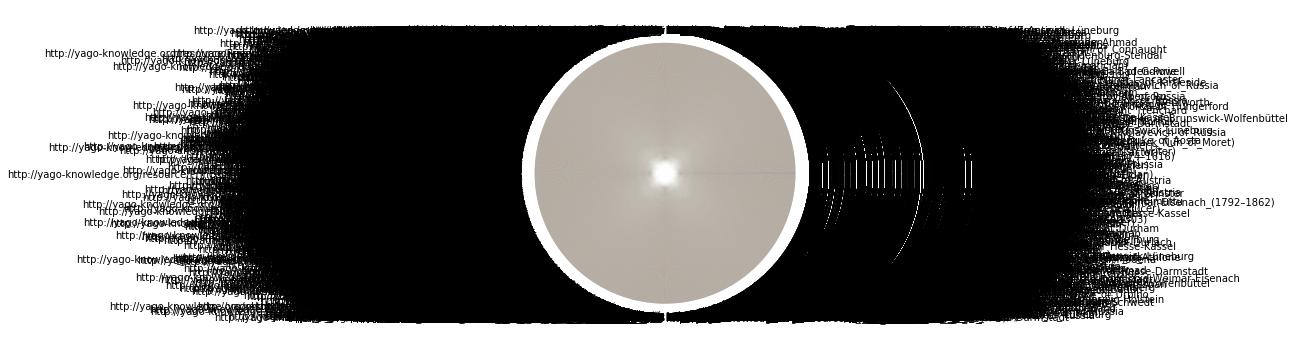

In [24]:
subject["count"].plot.pie(figsize=(6,6)).set_ylabel('')

Text(0, 0.5, '')

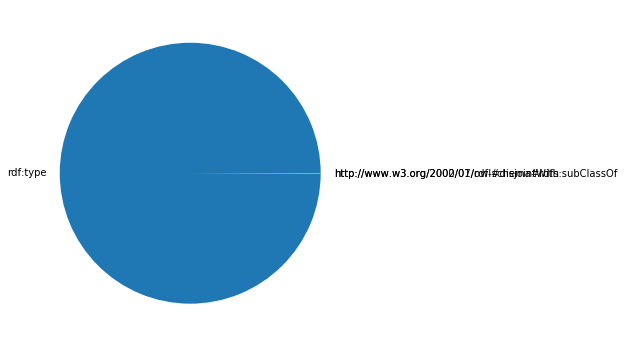

In [26]:
properties["count"].plot.pie(figsize=(6,6)).set_ylabel('')

Text(0, 0.5, '')

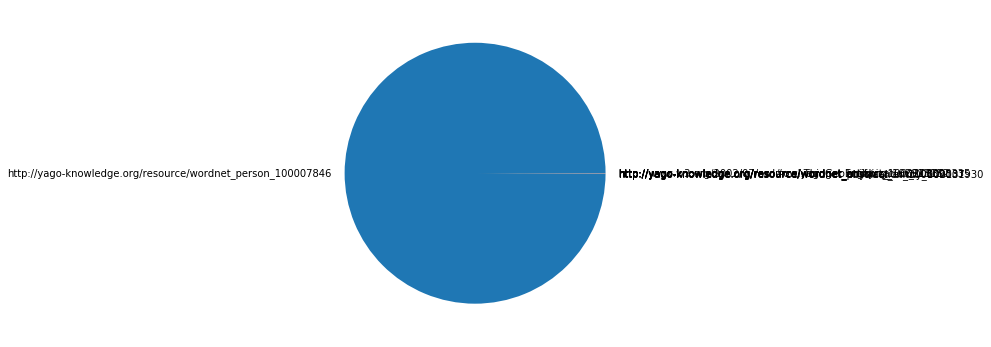

In [28]:
obj["count"].plot.pie(figsize=(6,6)).set_ylabel('')

In [29]:
subject.to_csv(input_path + 'subject_statistics.csv', sep='\t')
properties.to_csv(input_path + 'predicate_statistics.csv', sep='\t')
obj.to_csv(input_path + 'object_statistics.csv', sep='\t')

In [30]:
statistics.math.fsum(properties["count"])

12085.0

## Filter yago10 dataset by person

In [89]:
datset_yago10_person = pd.read_csv(input_path + 'yago_dataset_person.nt', delimiter=' ', header=None,encoding='utf-8')
datset_yago10 = pd.read_csv(input_path + 'yago10.nt', delimiter=' ', header=None, encoding='utf-8')
datset_yago10_person.head()

,0,1,2,3
0,<http://yago-knowledge.org/resource/Govind_Nihalani>,<http://www.w3.org/1999/02/22-rdf-syntax-ns#type>,<http://yago-knowledge.org/resource/wordnet_person_100007846>,.
1,<http://yago-knowledge.org/resource/Mickey_Rooney>,<http://www.w3.org/1999/02/22-rdf-syntax-ns#type>,<http://yago-knowledge.org/resource/wordnet_person_100007846>,.
2,<http://yago-knowledge.org/resource/Leif_Erickson_(actor)>,<http://www.w3.org/1999/02/22-rdf-syntax-ns#type>,<http://yago-knowledge.org/resource/wordnet_person_100007846>,.
3,<http://yago-knowledge.org/resource/Clara_Morgane>,<http://www.w3.org/1999/02/22-rdf-syntax-ns#type>,<http://yago-knowledge.org/resource/wordnet_person_100007846>,.
4,<http://yago-knowledge.org/resource/Omar_Bradley>,<http://www.w3.org/1999/02/22-rdf-syntax-ns#type>,<http://yago-knowledge.org/resource/wordnet_person_100007846>,.


In [90]:
print(datset_yago10_person.shape[0])
print(datset_yago10.shape[0])

12085
1089040


## Select only the triples related to person

In [112]:
yago10_person = pd.DataFrame()
for sub in range(datset_yago10_person.shape[0]):
    subject = datset_yago10[datset_yago10[0].isin({datset_yago10_person[0][sub]})]
    frames = [yago10_person, subject]
    yago10_person = pd.concat(frames)

In [113]:
print(yago10_person.shape)

(98419, 4)


In [114]:
yago10_person.head()

,0,1,2,3
574800,<http://yago-knowledge.org/resource/Govind_Nihalani>,<http://yago-knowledge.org/resource/created>,<http://yago-knowledge.org/resource/Thakshak>,.
574801,<http://yago-knowledge.org/resource/Govind_Nihalani>,<http://yago-knowledge.org/resource/created>,<http://yago-knowledge.org/resource/Party_(1984_film)>,.
574802,<http://yago-knowledge.org/resource/Govind_Nihalani>,<http://yago-knowledge.org/resource/created>,<http://yago-knowledge.org/resource/Dev_(film)>,.
574803,<http://yago-knowledge.org/resource/Govind_Nihalani>,<http://yago-knowledge.org/resource/hasGender>,<http://yago-knowledge.org/resource/male>,.
574804,<http://yago-knowledge.org/resource/Govind_Nihalani>,<http://yago-knowledge.org/resource/wasBornIn>,<http://yago-knowledge.org/resource/Karachi>,.


In [115]:
yago10_person = yago10_person.drop_duplicates()
yago10_person.shape

(98419, 4)

In [120]:
copy = yago10_person
title = u"Klüft skräms inför på fédéral électoral große"
print(title)
import unicodedata
unicodedata.normalize('NFKD', title).encode('ascii','ignore')

Klüft skräms inför på fédéral électoral große


b'Kluft skrams infor pa federal electoral groe'

In [138]:
dictionary = {'\\n':'^'}
yago10_person.replace(dictionary, regex=True, inplace=True)
#yago10_person[0].values.astype('UTF-8')
#yago10_person[1].values.astype('UTF-8')
#yago10_person[2].values.astype('UTF-8')
#copy[0] = unicodedata.normalize('NFKD', copy[0]).encode('ascii','ignore')
#copy[1] = unicodedata.normalize('NFKD', copy[1]).encode('ascii','ignore')
#copy[2] = unicodedata.normalize('NFKD', copy[2]).encode('ascii','ignore')

#yago10_person[1] = yago10_person[1].str.replace("\u", "'")
#yago10_person[2] = yago10_person[2].str.replace("\u", "'")

In [139]:
yago10_person.head()

,0,1,2,3
574800,<http://yago-knowledge.org/resource/Govind_Nihalani>,<http://yago-knowledge.org/resource/created>,<http://yago-knowledge.org/resource/Thakshak>,.
574801,<http://yago-knowledge.org/resource/Govind_Nihalani>,<http://yago-knowledge.org/resource/created>,<http://yago-knowledge.org/resource/Party_(1984_film)>,.
574802,<http://yago-knowledge.org/resource/Govind_Nihalani>,<http://yago-knowledge.org/resource/created>,<http://yago-knowledge.org/resource/Dev_(film)>,.
574803,<http://yago-knowledge.org/resource/Govind_Nihalani>,<http://yago-knowledge.org/resource/hasGender>,<http://yago-knowledge.org/resource/male>,.
574804,<http://yago-knowledge.org/resource/Govind_Nihalani>,<http://yago-knowledge.org/resource/wasBornIn>,<http://yago-knowledge.org/resource/Karachi>,.


In [140]:
yago10_person.to_csv(input_path + 'Yago10_person/without semantics/' + 'yago_dataset_person.nt', sep=' ', index=False, header=None, encoding='utf-8')

In [67]:
input_path

'/media/rivas/Data1/Data-mining/Kcap/datasets/Yago10/'

In [142]:
y10_no_sem = input_path + 'Yago10_person/without semantics/' + 'yago_dataset_person.nt'
y10_no_semantics = Graph()
y10_no_semantics.parse(y10_no_sem, format="nt")

<Graph identifier=Ne8d91fe7ded849a9a24343a3665d94df (<class 'rdflib.graph.Graph'>)>

## Merging graphs (yago_dataset_person + y10_no_semantics) and save

In [143]:
yago10_person_semantics = yago_dataset_person + y10_no_semantics
yago10_person_semantics.serialize(destination=input_path + 'Yago10_person/with semantics/' + 'yago_dataset_person.nt', format='nt')

## Create local endpoint (yago10_person_semantics)

In [145]:
print(len(yago10_person_semantics))
yago_semantics=LocalEndpoint(yago10_person_semantics)

110504


## yago10_person_semantics statistics

In [146]:
subject=yago_semantics.select("""
   SELECT ?s (COUNT(*) AS ?count) {
      ?s ?p ?o .
      
   } GROUP BY ?s ORDER BY DESC(?count)
""")

properties=yago_semantics.select("""
   SELECT ?p (COUNT(*) AS ?count) {
      ?s ?p ?o .
      
   } GROUP BY ?p ORDER BY DESC(?count)
""")

obj = yago_semantics.select("""
   SELECT ?o (COUNT(*) AS ?count) {
      ?s ?p ?o .
      
   } GROUP BY ?o ORDER BY DESC(?count)
""")

Text(0, 0.5, '')

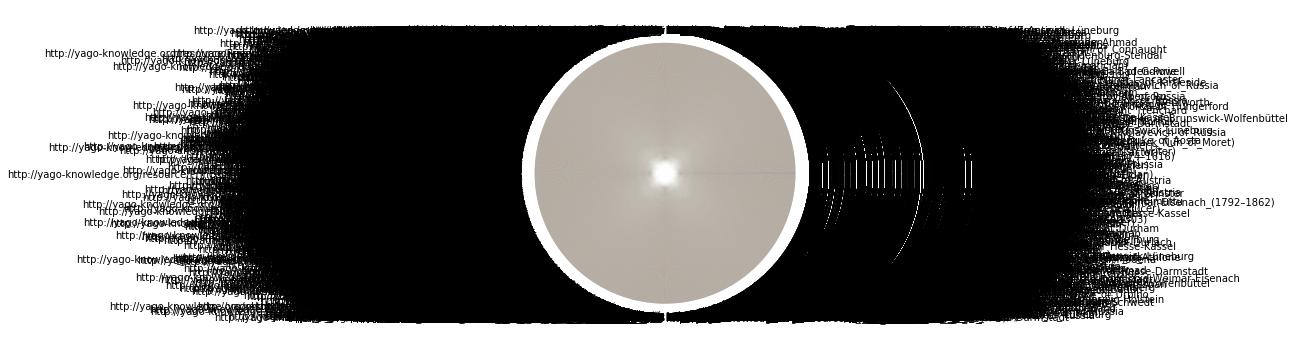

In [24]:
subject["count"].plot.pie(figsize=(6,6)).set_ylabel('')

Text(0, 0.5, '')

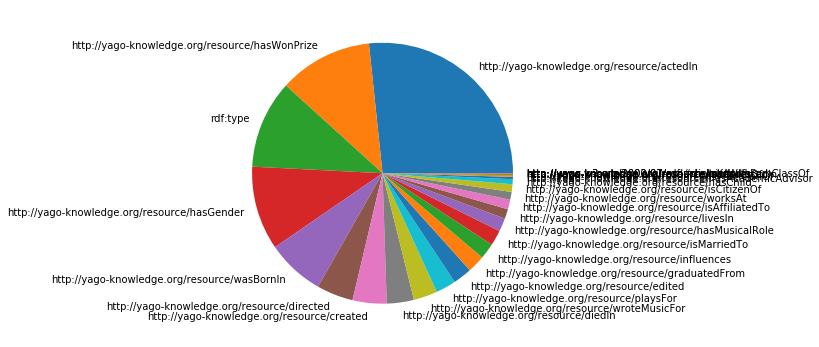

In [147]:
properties["count"].plot.pie(figsize=(6,6)).set_ylabel('')

Text(0, 0.5, '')

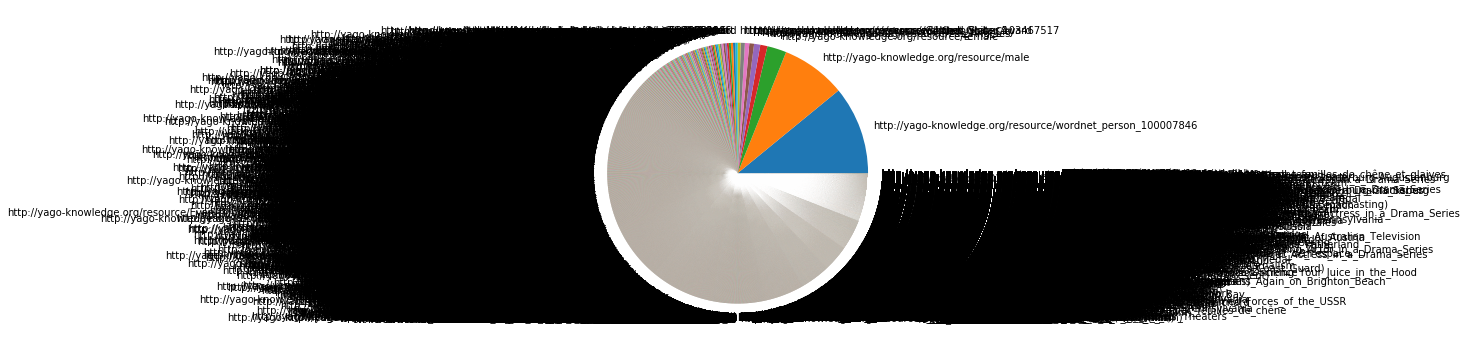

In [148]:
obj["count"].plot.pie(figsize=(6,6)).set_ylabel('')

In [150]:
subject.to_csv(input_path + 'Yago10_person/with semantics/Statistics (Yago10_person)/' + 'subject_statistics.csv', sep='\t')
properties.to_csv(input_path + 'Yago10_person/with semantics/Statistics (Yago10_person)/' + 'predicate_statistics.csv', sep='\t')
obj.to_csv(input_path + 'Yago10_person/with semantics/Statistics (Yago10_person)/' + 'object_statistics.csv', sep='\t')

In [30]:
statistics.math.fsum(properties["count"])

12085.0